In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm

In [3]:
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto.csv')
#t_eq = t_eq.iloc[30000:30100]
#t_eq = t_eq.iloc[:100]


df_full = pd.read_csv('SMBH_Data_01_22_24.csv',header=1)

In [4]:
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto.csv')

# randomly pick 1000 rows from t_eq as the new t_eq
t_eq = t_eq.sample(n=1000, random_state=1)
t_eq

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,log_like,aic,evolutions,iterations
9486,15,0.020197,0.139136,(((x15 / 0.2781055358753451) + x19) - (log10((...,3.595757261186734*x15 + x19 - log((x2 + exp(x4...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,2,"{'x42', 'x19', 'x2', 'x15', 'x21'}",5,5,-1.878345,7.756689,0,765
2664,1,0.683744,0.000000,8.378707669144019,8.378707669144019,PySRFunction(X=>8.378707669144019),1,set(),0,0,-63.588224,129.176447,0,208
21126,4,0.115187,0.184676,(log10(x15) * 23.417802588815807),23.417802588815807*log(x15)/log(10),PySRFunction(X=>23.417802588815807*log(x15)/lo...,1,{'x15'},1,1,-10.712431,23.424861,0,1805
18464,4,0.115187,0.184676,(log10(x15) * 23.417802588815807),23.417802588815807*log(x15)/log(10),PySRFunction(X=>23.417802588815807*log(x15)/lo...,1,{'x15'},1,1,-10.712431,23.424861,0,1563
29175,19,0.015566,0.113730,((((x15 / 0.2928557769080886) + x19) - log10((...,3.414650073007934*x15 + x19 - log(-0.768482453...,PySRFunction(X=>3.414650073007934*x15 + x19 - ...,3,"{'x42', 'x9', 'x19', 'x15', 'x52', 'x21'}",6,6,-1.447681,8.895362,0,2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,12,0.031897,0.556451,(((2.9927476469690193 - (-12.830511212512805 /...,x15*(2.9927476469690193 + 12.830511212512805/(...,PySRFunction(X=>x15*(2.9927476469690193 + 12.8...,3,"{'x42', 'x22', 'x15'}",3,3,-2.966385,11.932770,0,70
18269,7,0.040002,0.276948,((x15 * 4.193380981163565) - (x42 * 0.45103887...,4.193380981163565*x15 - 0.4510388768884222*x42,PySRFunction(X=>4.193380981163565*x15 - 0.4510...,2,"{'x42', 'x15'}",2,2,-3.720189,11.440377,0,1545
18472,17,0.019542,0.016484,(((x15 / 0.2781055358753451) + x19) - (log10((...,3.595757261186734*x15 + x19 - log((x2 + x8 + e...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,2,"{'x42', 'x19', 'x2', 'x15', 'x21', 'x8'}",6,6,-1.817431,7.634861,0,1563
14523,17,0.019542,0.016484,(((x15 / 0.2781055358753451) + x19) - (log10((...,3.595757261186734*x15 + x19 - log((x2 + x8 + e...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,2,"{'x42', 'x19', 'x2', 'x15', 'x21', 'x8'}",6,6,-1.817431,7.634861,0,1204


In [5]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','M_BH']
low_scatter_para.append('M_BH_std_sym')

In [6]:
df=df_full[low_scatter_para]
df=df.dropna()
df

,ETG,T-type,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,...,logHalo,B-V,V-[3.6],GJC23W1-W2,GJC23W2-W3,"GJC23log(M*,gal/M_sun)",GJC23log(SFR),GJC23log(sSFR),M_BH,M_BH_std_sym
1,1,-4.8,0,0.0,0,1.0,0,0,1.0,0,...,13.959319,0.966,3.84,-0.05,0.39,11.24,-0.763463,-12.003463,9.380211,0.180956
3,1,-4.9,0,0.0,0,0.0,0,0,1.0,0,...,14.060462,0.954,3.36,-0.08,0.02,11.47,-1.002614,-12.472614,9.102971,0.086075
6,1,-2.8,0,1.0,0,0.0,0,0,0.0,0,...,11.525458,0.889,2.77,0.03,1.28,8.85,-1.514279,-10.364279,5.740000,0.103967
7,1,-1.2,0,1.0,0,1.0,0,0,0.0,0,...,13.405242,0.977,3.13,-0.02,0.52,11.10,-1.059982,-12.159982,8.677184,0.099526
9,1,-4.8,0,0.0,0,0.0,0,0,0.0,0,...,12.727499,0.893,2.90,-0.04,0.27,10.64,-1.007889,-11.647889,7.591065,0.194876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,1.1,0,1.0,0,0.0,0,0,1.0,0,...,13.218697,0.935,3.11,-0.02,0.90,11.06,-0.485452,-11.545452,8.808460,0.027143
132,0,2.9,1,1.0,0,0.0,0,0,0.0,1,...,13.233744,0.860,3.24,0.00,2.20,11.06,0.202434,-10.857566,8.279168,0.052000
133,0,2.3,0,1.0,1,0.0,0,0,1.0,1,...,12.289895,0.735,3.48,0.02,2.71,10.38,-0.082862,-10.462862,6.833669,0.101335
134,0,2.2,0,1.0,0,0.0,0,0,1.0,1,...,12.536387,0.803,3.31,0.02,2.21,10.54,-0.141944,-10.681944,6.198130,0.108574


In [22]:
lll=[]
intrinsic_scatter=[]


number_matching_pattern = r"(?<![a-zA-Z0-9_.])[+-]?(\d+\.\d+|\.\d+|\d+\.|\d+)(?:[eE][-+]?\d+)?"
swap_operator_list = {'log10':'np.log10','exp':'np.exp','pow':'**'}

for row in tqdm(t_eq.iterrows(),total=len(t_eq)):

    equation = row[1]['equation']

    # swap constants
    constants = re.findall(number_matching_pattern, equation)
    variable_list=[]
    for i in range(len(constants)):
        variable_list.append('p['+str(i)+']')

    for i in range(len(constants)):
        equation = equation.replace(constants[i],variable_list[i])


    # if any of keys in swap_operator_list is in equation, replace it with the value
    for key, value in swap_operator_list.items():
        equation = equation.replace(key, value)


    #func=eval("lambda "+", ".join(re.findall(r'\bx\d+', equation))+f": {equation}")

    labels = re.findall(r'x(\d+)', equation)
    labels = [int(label) for label in labels]

    x=[]
    for i in range(len(labels)):
        x.append(df[low_scatter_para[labels[i]]])

    mu_obs = df['M_BH']

    sigma_y_obs2 = df['M_BH_std_sym']*df['M_BH_std_sym']

    ##############################
    def loglikelihood(p):

        equation_=equation
        for i in range(len(variable_list)):
            equation_ = equation_.replace(variable_list[i],str(p[i]))

        func=eval("lambda "+", ".join(re.findall(r'\bx\d+', equation_))+f": {equation_}")

        mu_pred = func(*x)
        sigma_y =  np.sqrt(sigma_y_obs2 + p[-1]*p[-1])
        #sigma_y =  np.sqrt(sigma_y_obs2)
        norm_residuals = (mu_obs - mu_pred) / sigma_y

        log_l = -0.5*len(df)*np.log(2*np.pi) -np.log(sigma_y).sum() - 0.5*(norm_residuals*norm_residuals).sum()

        return -log_l
    ###############################

    current_parameter_vector=np.array(np.float64(constants))
    current_parameter_vector=np.append(current_parameter_vector,0.3) # last p is intrinsic scatter

    #print(-loglikelihood(current_parameter_vector))
    try:
        result = opt.minimize(loglikelihood, current_parameter_vector, method='Nelder-Mead', tol=1e-7, options={'maxiter':5e5, 'maxfev':5e5, 'adaptive':True})
        lll.append(-loglikelihood(result.x))
        intrinsic_scatter.append(result.x[-1])
    except:
        lll.append(np.nan)
        intrinsic_scatter.append(np.nan)
    #print(-loglikelihood(result.x))
    # result = opt.minimize(loglikelihood, result.x, method='Nelder-Mead', tol=1e-9, options={'maxiter':5e6, 'maxfev':5e6, 'adaptive':True})
    # print(-loglikelihood(result.x))
        

        
lll=np.array(lll)

100%|██████████| 1000/1000 [03:11<00:00,  5.21it/s]


In [23]:
intrinsic_scatter=np.array(intrinsic_scatter)

In [8]:
#lll

In [18]:
t_eq.columns

Index(['complexity', 'loss', 'score', 'equation', 'sympy_format',
       'lambda_format', 'number_constants', 'variables', 'number_variables',
       'unique_number_variables', 'log_like', 'aic', 'evolutions',
       'iterations'],
      dtype='object')

Text(0, 0.5, 'lll')

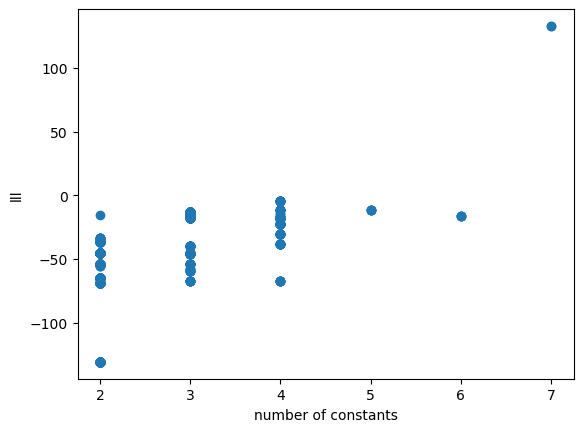

In [9]:
plt.scatter(t_eq['number_constants']+1,lll)
plt.xlabel('number of constants')
plt.ylabel('lll')
#plt.ylim(0,400)

Text(0, 0.5, 'aic')

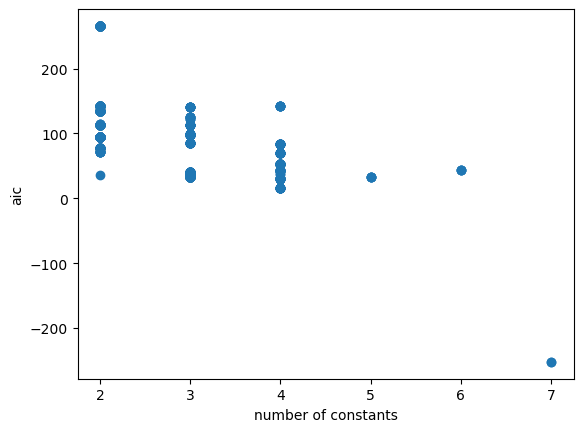

In [10]:
aic = -2*lll+2*(t_eq['number_constants']+1)
plt.scatter(t_eq['number_constants']+1,aic)
plt.xlabel('number of constants')
plt.ylabel('aic')

In [11]:
aic.argmin()

379

In [15]:
t_eq.iloc[aic.argmin()]['equation']

'(((3.1597743231772513 - ((((-5.867620697190853 + 0.8957817731622927) - log10(0.5744549736105595)) - x3) / ((3.5215444484562646 - ((x5 + x40) - exp(x42))) / 0.8957817731622927))) * x15) + x19)'

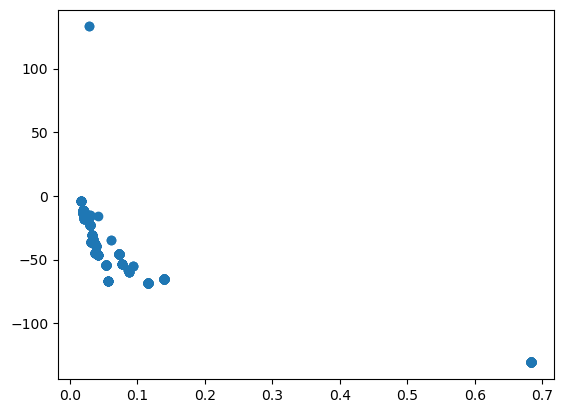

In [21]:
plt.scatter(t_eq['loss'],lll)

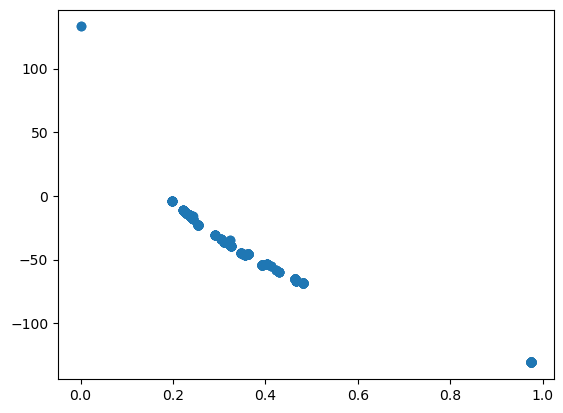

In [24]:
plt.scatter(intrinsic_scatter,lll)

Text(0, 0.5, 'aic')

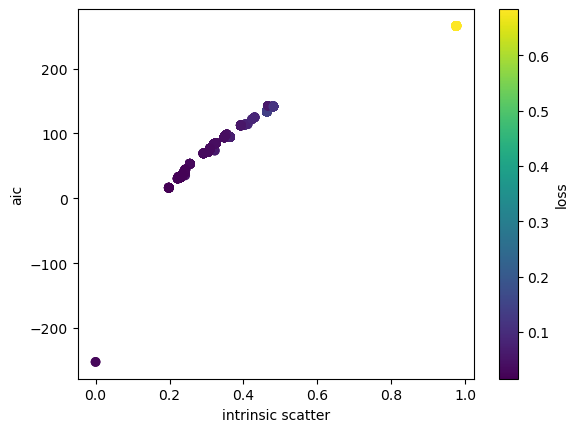

In [27]:
plt.scatter(intrinsic_scatter,aic,c=t_eq['loss'])
plt.colorbar(label='loss')
plt.xlabel('intrinsic scatter')
plt.ylabel('aic')

In [38]:
intrinsic_scatter.min()

nan

In [53]:
for i in range(len(labels)):
    print(labels[i],low_scatter_para[labels[i]])

3 Disk
5 Core
40 log_Rho_e_Exact_new
42 logRho_soi_approx_new
15 log_sigma0
19 log_n_sph_eq


In [34]:
equation= '(((3.1597743231772513 - ((((-5.867620697190853 + 0.8957817731622927) - log10(0.5744549736105595)) - x3) / ((3.5215444484562646 - ((x5 + x40) - exp(x42))) / 0.8957817731622927))) * x15) + x19)'
for key, value in swap_operator_list.items():
    equation = equation.replace(key, value)
func=eval("lambda "+", ".join(re.findall(r'\bx\d+', equation))+f": {equation}")

labels = re.findall(r'x(\d+)', equation)
labels = [int(label) for label in labels]

x=[]
for i in range(len(labels)):
    x.append(df[low_scatter_para[labels[i]]])

mu_pred=func(*x)
mu_obs = df['M_BH']
sigma_y = df['M_BH_std_sym']

Text(0, 0.5, 'mu_obs-mu_pred')

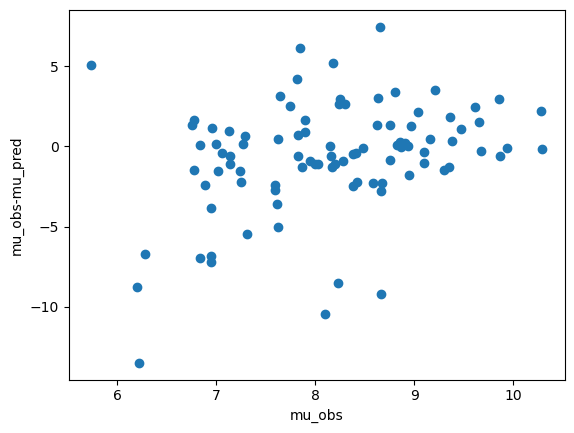

In [36]:
plt.scatter(mu_obs,(mu_obs-mu_pred)/sigma_y)
plt.xlabel('mu_obs')
plt.ylabel('mu_obs-mu_pred')